In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv('Fish.csv')

In [46]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [47]:
# we want to predict the Weight

In [48]:
lst = [1, 2, 3, 4, 5]
print(np.mean(lst))

3.0


In [49]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [51]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [52]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

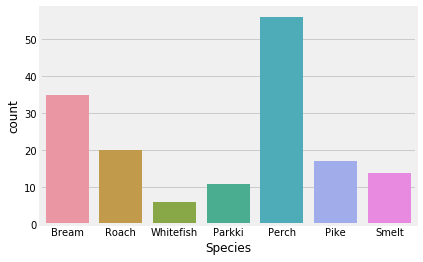

In [53]:
sns.countplot(data = df, x= 'Species')

In [54]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [55]:
cols = df.columns.tolist()

In [56]:
cols

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [57]:
cols= ['Length1', 'Length2', 'Length3', 'Height', 'Width']


In [58]:
cols

['Length1', 'Length2', 'Length3', 'Height', 'Width']

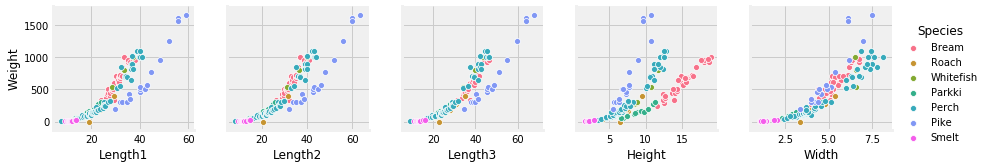

In [59]:
sns.pairplot(data = df, x_vars = cols, y_vars = 'Weight', hue = 'Species')

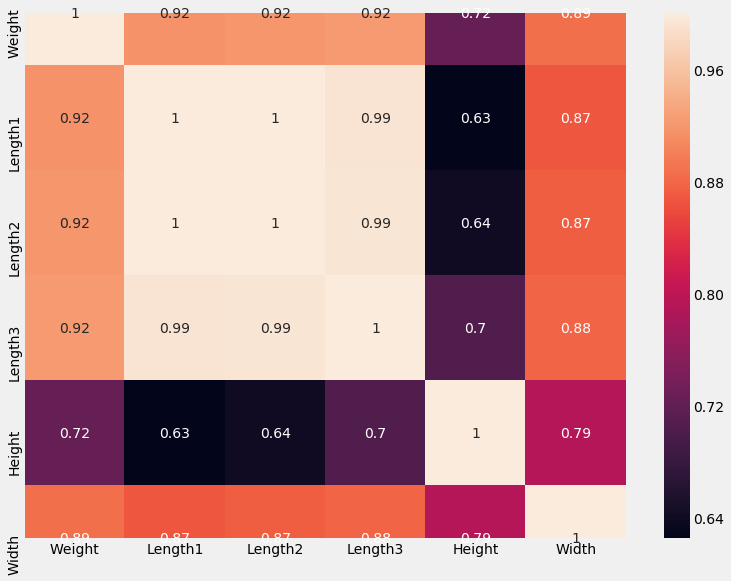

In [60]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr(), annot = True)


In [64]:
y = df['Weight']
cols

['Length1', 'Length2', 'Length3', 'Height', 'Width']

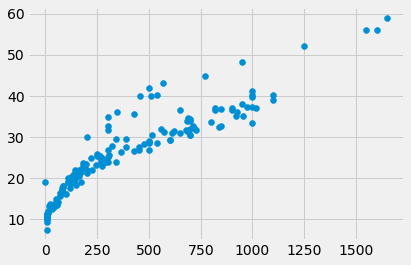

In [65]:
plt.scatter(x = df['Weight'], y = df['Length1'])

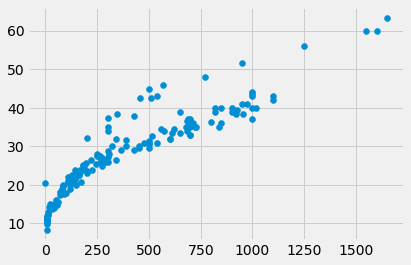

In [66]:
plt.scatter(x = df['Weight'], y = df['Length2'])

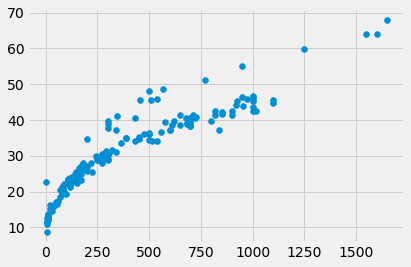

In [67]:
plt.scatter(x = df['Weight'], y = df['Length3'])

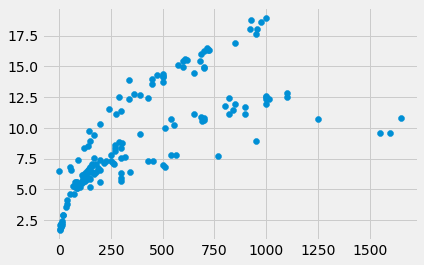

In [69]:
plt.scatter(x = df['Weight'], y = df['Height'])

# all features are corrlated with the label feature


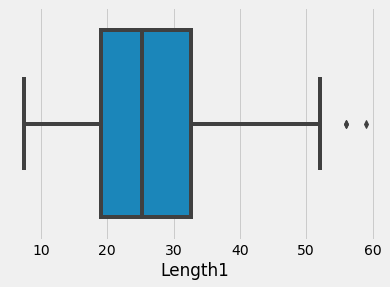

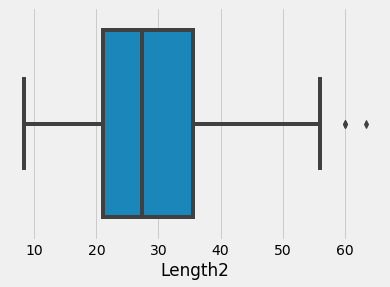

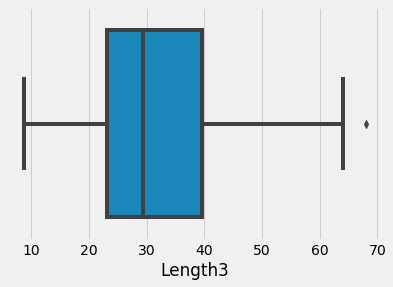

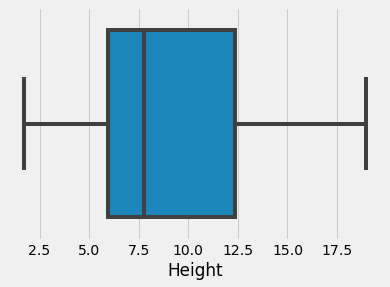

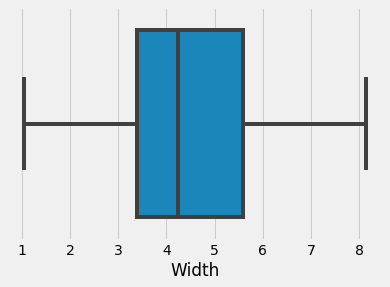

In [75]:
for i in range(len(cols)):
    sns.boxplot(df[cols[i]])
    plt.show()

## Length1 , Length2 & Length3 contains some outliers 

In [83]:
for name in cols:
    print(name, end = ' Has skewness equal >>  ')
    print(df[name].skew())

Length1 Has skewness equal >>  0.5884823308370954
Length2 Has skewness equal >>  0.5398630565804722
Length3 Has skewness equal >>  0.39154084789678356
Height Has skewness equal >>  0.39718636256683015
Width Has skewness equal >>  0.00497224623809999


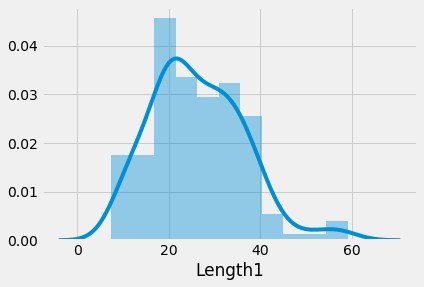

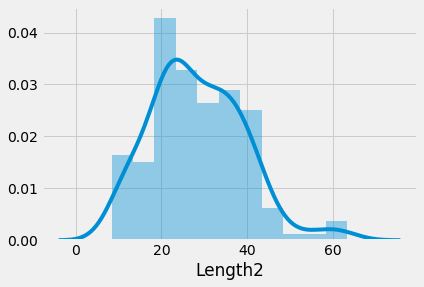

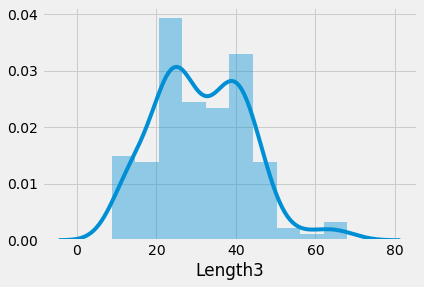

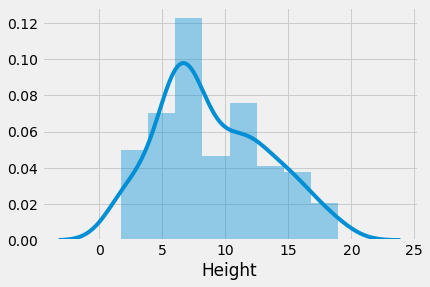

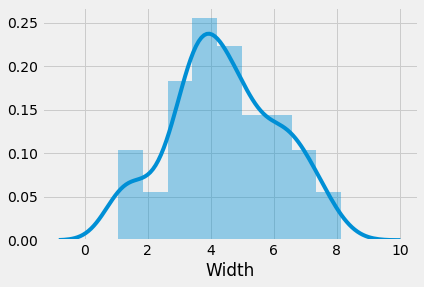

In [84]:
for name in cols:
    sns.distplot(df[name])
    plt.show()

In [87]:
df =pd.get_dummies(df)

In [89]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [90]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [92]:
X=df[['Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish']]

In [93]:
y = df['Weight']

In [94]:
from sklearn.model_selection import train_test_split


In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [96]:
from sklearn.linear_model import LinearRegression


In [113]:
LR = LinearRegression()


In [115]:
LR.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
y_pred = LR.predict(X_test)


In [129]:
(abs(y_test-y_pred)).describe()


count     32.000000
mean      88.698815
std       97.553771
min        4.935485
25%       26.111024
50%       54.691978
75%      108.725854
max      444.464277
Name: Weight, dtype: float64

In [136]:
LR.score(X_train, y_train)


0.9342848664059865

In [138]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test,y_pred))
print('rms Error :',rms)



rms Error : 130.71656295965462
